In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#### Ques 16.3

In [2]:
# Load the CSV file
file_path = r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\DepartmentStoreSales.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data 
print(data.head())

   Quarter  Sales
0        1  50147
1        2  49325
2        3  57048
3        4  76781
4        5  48617


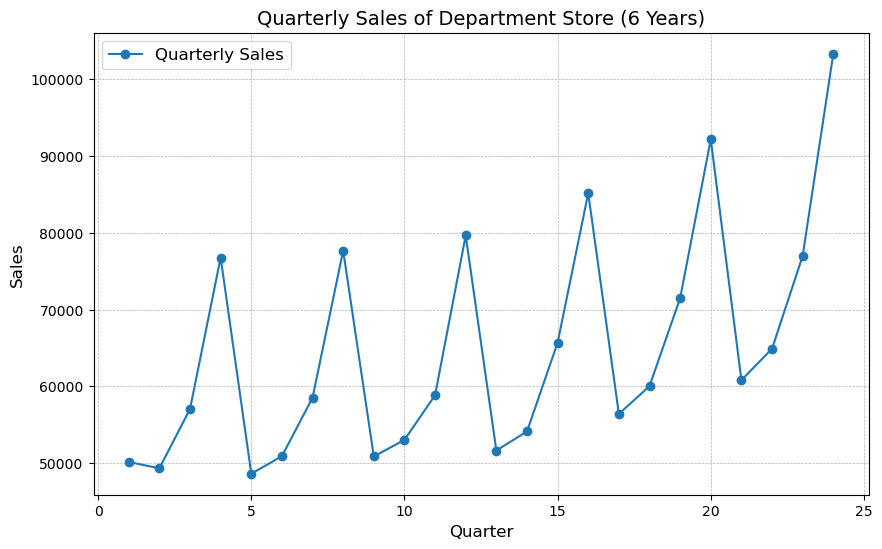

In [3]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data['Quarter'], data['Sales'], marker='o', linestyle='-', label='Quarterly Sales')
plt.title('Quarterly Sales of Department Store (6 Years)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

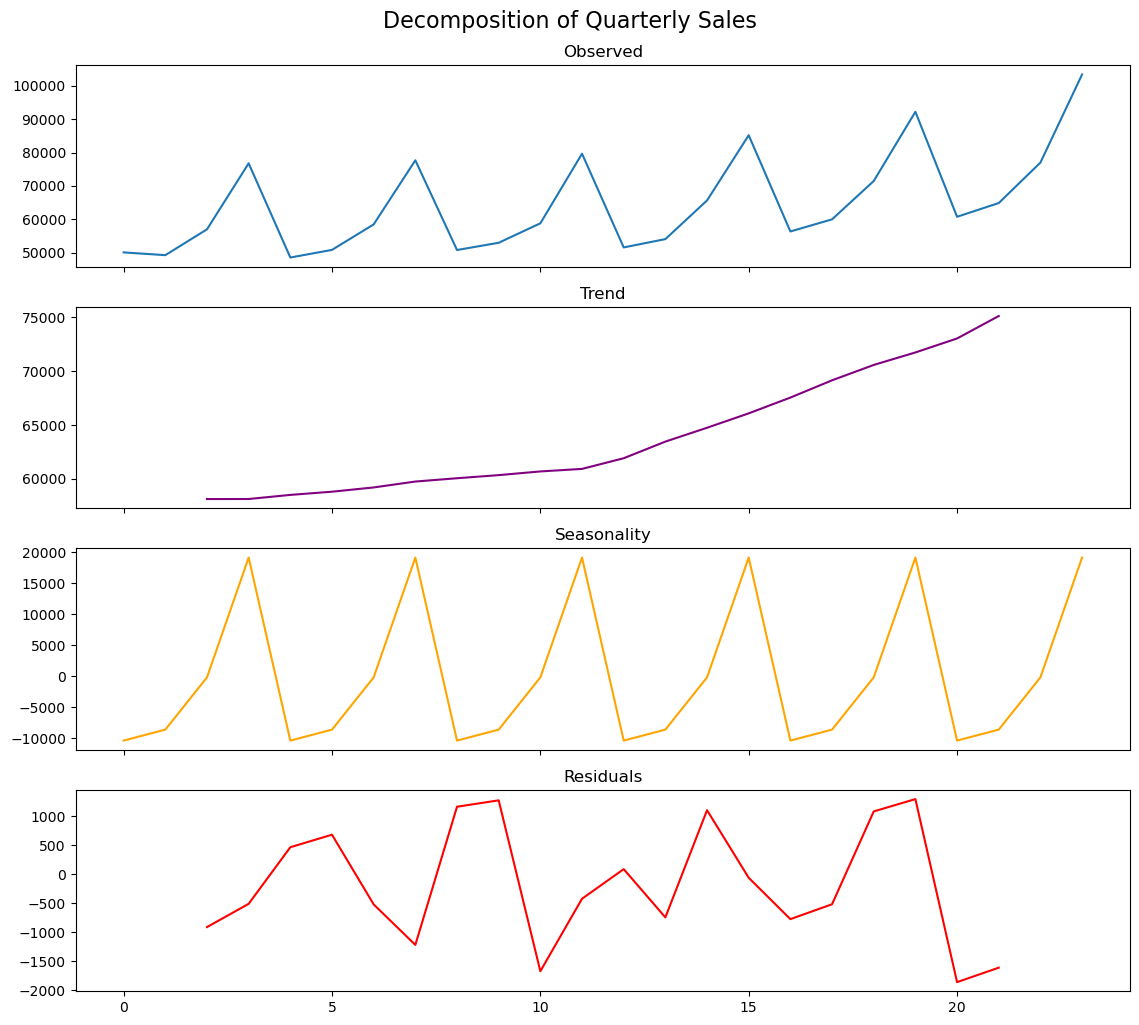

In [4]:
# Decomposing the time series
data.reset_index(drop=True, inplace=True)

# Perform decomposition
decomposition = seasonal_decompose(data['Sales'], model='additive', period=4)

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(11.5, 10), sharex=True)
axes[0].plot(decomposition.observed, label='Observed')
axes[0].set_title('Observed')
axes[1].plot(decomposition.trend, label='Trend', color='purple')
axes[1].set_title('Trend')
axes[2].plot(decomposition.seasonal, label='Seasonality', color='orange')
axes[2].set_title('Seasonality')
axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')
plt.tight_layout()
plt.suptitle('Decomposition of Quarterly Sales', fontsize=16, y=1.02)
plt.show()

In [5]:
# Level
average_level = decomposition.observed.mean()
average_level

64757.375

In [6]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: -181.40625000000057


#### Ques 16.4

In [7]:
# Reading the Appliance shipments file
shipments_df = pd.read_csv(r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\ApplianceShipments.csv")

In [8]:
shipments_df.head()

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123


In [9]:
# Convert Quarter column to datetime format (e.g., '1985-Q1' to proper dates)
shipments_df['Quarter'] = (shipments_df['Quarter']).astype(str)


In [10]:
# Map quarters to months
quarter_to_month = {
    'Q1': '01',  # January
    'Q2': '04',  # April
    'Q3': '07',  # July
    'Q4': '10'   # October
}

# Convert 'Quarter' to datetime
shipments_df['Quarter'] = shipments_df['Quarter'].apply(
    lambda x: pd.to_datetime(x.split('-')[1] + '-' + quarter_to_month[x.split('-')[0]])
)

In [11]:
shipments_df.head()

,Quarter,Shipments
0,1985-01-01,4009
1,1985-04-01,4321
2,1985-07-01,4224
3,1985-10-01,3944
4,1986-01-01,4123


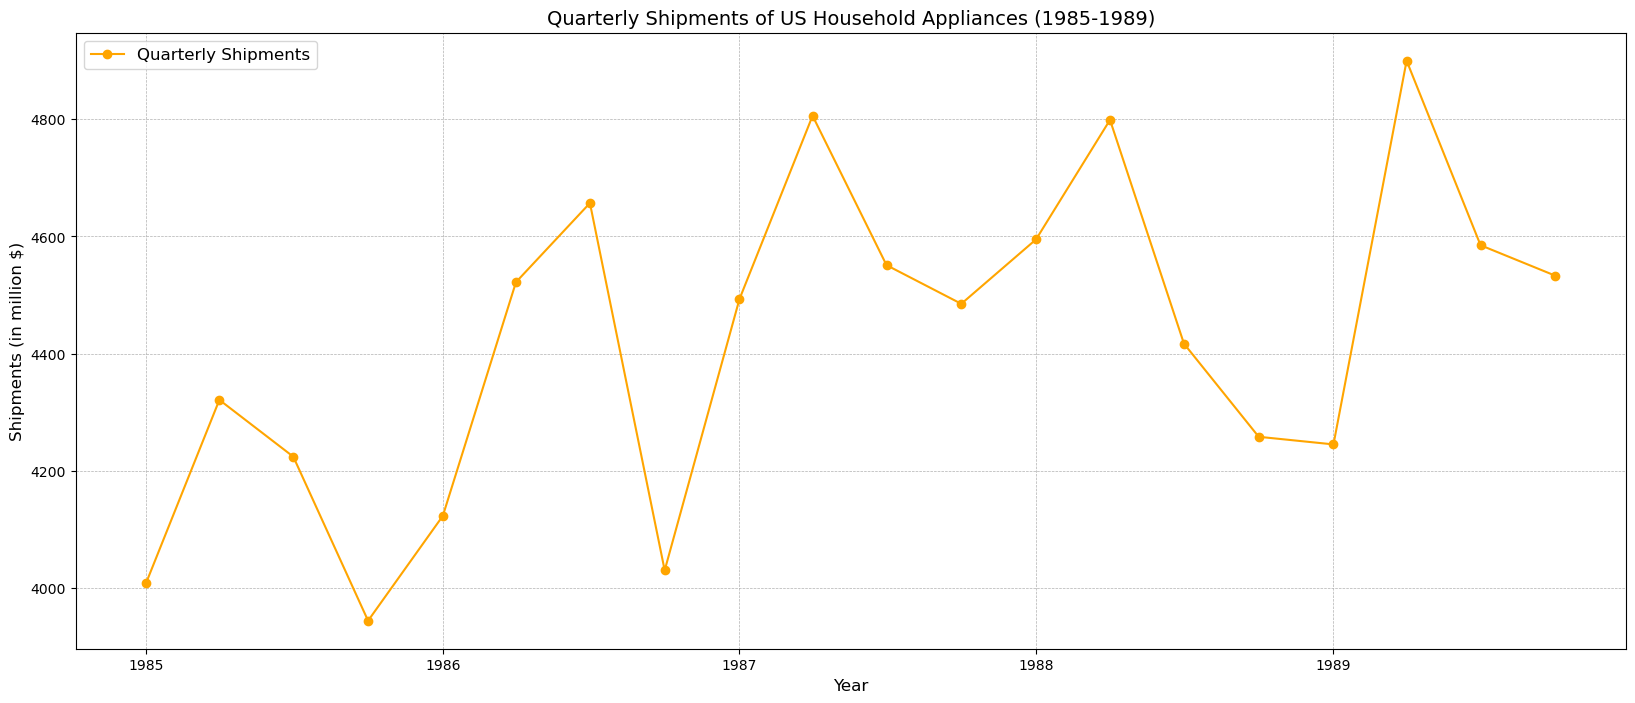

In [12]:
# Plotting the time series
plt.figure(figsize=(20, 8))
plt.plot(shipments_df['Quarter'], shipments_df['Shipments'], marker='o', linestyle='-', label='Quarterly Shipments', color= 'orange')
plt.title('Quarterly Shipments of US Household Appliances (1985-1989)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Shipments (in million $)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

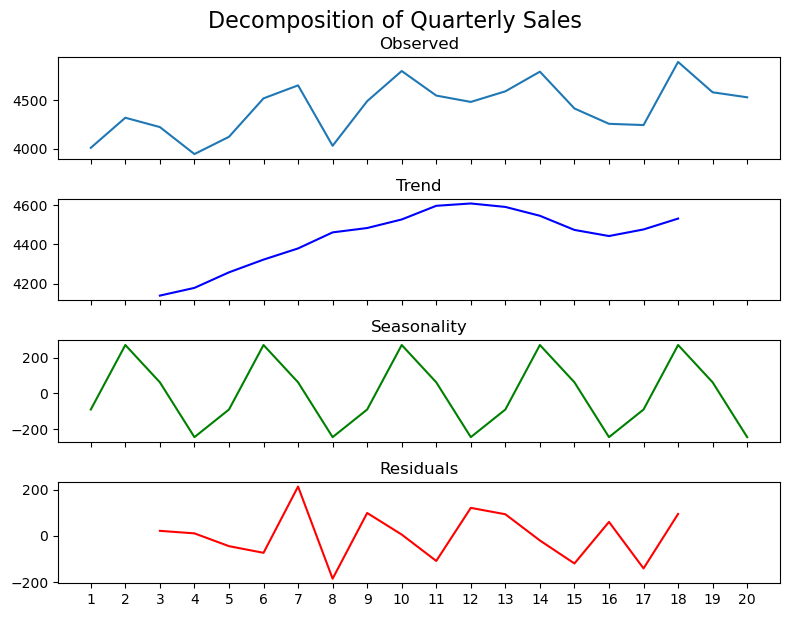

In [13]:
# Perform decomposition
decomposition = seasonal_decompose(shipments_df['Shipments'], model='additive', period=4)

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

# Plot each component with appropriate labels
axes[0].plot(decomposition.observed, label='Observed')
axes[0].set_title('Observed')

axes[1].plot(decomposition.trend, label='Trend', color='blue')
axes[1].set_title('Trend')

axes[2].plot(decomposition.seasonal, label='Seasonality', color='green')
axes[2].set_title('Seasonality')

axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')

# x-axis has whole numbers for quarters
plt.xticks(ticks=range(len(shipments_df['Shipments'])), labels=range(1, len(shipments_df['Shipments']) + 1))
plt.tight_layout()
plt.suptitle('Decomposition of Quarterly Sales', fontsize=16, y=1.02)
plt.show()

In [14]:
# Level
average_level = decomposition.observed.mean()
average_level

4424.85

In [15]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: 2.3515625


#### Ques 16.5

In [25]:
work_hours_df = pd.read_csv(r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\CanadianWorkHours.csv")

In [17]:
work_hours_df.head()

,Year,Hours
0,1966,37.2
1,1967,37.0
2,1968,37.4
3,1969,37.5
4,1970,37.7


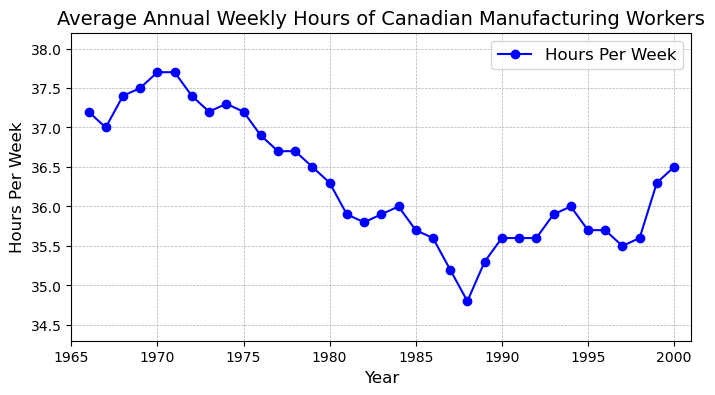

In [18]:
# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(work_hours_df['Year'], work_hours_df['Hours'], marker='o', linestyle='-', color='blue', label='Hours Per Week')

# Adjust axes
plt.xlim(work_hours_df['Year'].min() - 1, work_hours_df['Year'].max() + 1)  # Add padding to x-axis
plt.ylim(work_hours_df['Hours'].min() - 0.5, work_hours_df['Hours'].max() + 0.5)  # Add padding to y-axis

# Add labels, title, and grid
plt.title('Average Annual Weekly Hours of Canadian Manufacturing Workers', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Hours Per Week', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

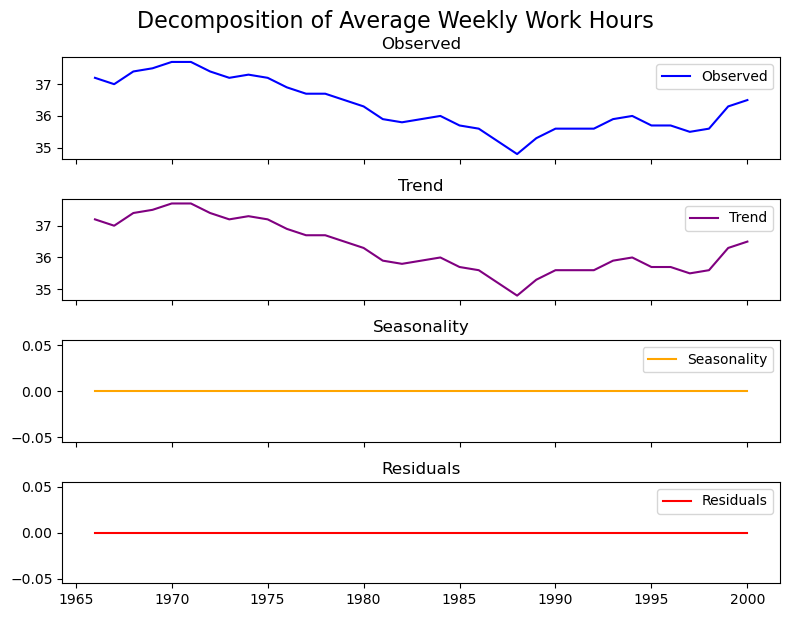

In [26]:
# Set 'Year' as the index and ensure it's treated as a time series
work_hours_df.set_index('Year', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(work_hours_df['Hours'], model='additive', period=1)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

axes[0].plot(decomposition.observed, label='Observed', color='blue')
axes[0].set_title('Observed')
axes[0].legend()

axes[1].plot(decomposition.trend, label='Trend', color='purple')
axes[1].set_title('Trend')
axes[1].legend()

axes[2].plot(decomposition.seasonal, label='Seasonality', color='orange')
axes[2].set_title('Seasonality')
axes[2].legend()

axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')
axes[3].legend()

plt.tight_layout()
plt.suptitle('Decomposition of Average Weekly Work Hours', fontsize=16, y=1.02)
plt.show()

In [27]:
# Level
average_level = decomposition.observed.mean()
average_level

36.311428571428564

In [28]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: 0.0


#### Ques 16.6